# Time Series Forecasting with ARIMA

Time Series Forecasting is a **crucial tool** for making informed decisions in various fields such as **weather prediction**, **sales analysis**, **business planning**, and **stock market analysis**. One popular method for Time Series Forecasting is the **ARIMA model**, short for **Autoregressive Integrated Moving Average**. In this article, we'll delve into the process of Time Series Forecasting using ARIMA with the **Python programming language**.

**Understanding ARIMA**:
**ARIMA** is an acronym for **Autoregressive Integrated Moving Average**. It's a **powerful algorithm** specifically designed for forecasting **Time Series Data**. ARIMA models are defined by three key parameters denoted as **ARIMA(p, d, q)**, where:

- 'p' signifies the **number of lagged observations** included in the model, capturing the **autoregressive component**.
- 'd' represents the **degree of differencing** needed to make the time series **stationary**. A value of **0** indicates stationary data, while **1** suggests **seasonal data**.
- 'q' indicates the **size of the moving average window**, capturing the **moving average component** of ARIMA.

By grasping these parameters and understanding how they interact, we can effectively employ ARIMA models to generate accurate forecasts for **time-dependent datasets**. Let's explore this further by implementing ARIMA in Python for Time Series Forecasting.

To embark on Time Series Forecasting with ARIMA, our initial step involves retrieving historical data on Google's stock prices using the Yahoo Finance API. This API offers a comprehensive source of financial data, enabling us to collect a detailed dataset spanning a defined timeframe. This dataset forms the cornerstone of our analysis, facilitating insights into Google's stock price dynamics over time.

In [5]:
#Below is a Python code snippet demonstrating how you can retrieve the latest stock price data using the Yahoo Finance API:
#pip install yfinance

In [6]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [7]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-28  157.970001  158.490005  155.979996  157.649994  156.812958   
2023-03-29  159.369995  161.050003  159.350006  160.770004  159.916412   
2023-03-30  161.529999  162.470001  161.270004  162.360001  161.497986   
2023-03-31  162.440002  165.000000  161.910004  164.899994  164.024475   
2023-04-03  164.270004  166.289993  164.220001  166.169998  165.287750   

              Volume  
Date                  
2023-03-28  45992200  
2023-03-29  51305700  
2023-03-30  49501700  
2023-03-31  68749800  
2023-04-03  56976200  


The provided code retrieves stock price data spanning from the current date back to the previous 360 days. However, in this dataset, the Date information is not presented as a separate column; instead, it serves as the index. To facilitate the utilization of this data for various data science tasks, it's essential to transform this index into a regular column. Below are the steps demonstrating how to accomplish this:

In [8]:
data["Date"] = data.index
data = data[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2023-03-28  157.970001  158.490005  155.979996  157.649994  156.812958   
1 2023-03-29  159.369995  161.050003  159.350006  160.770004  159.916412   
2 2023-03-30  161.529999  162.470001  161.270004  162.360001  161.497986   
3 2023-03-31  162.440002  165.000000  161.910004  164.899994  164.024475   
4 2023-04-03  164.270004  166.289993  164.220001  166.169998  165.287750   

     Volume  
0  45992200  
1  51305700  
2  49501700  
3  68749800  
4  56976200  


The resultant dataset mirrors the format typically obtained from Yahoo Finance, providing comprehensive stock price data accessible through Python. This method effectively retrieves stock price information, aligning with the structure commonly encountered in datasets acquired from Yahoo Finance.

In [9]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()


In [10]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [11]:
data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2024-03-15  143.410004  144.339996  141.130005  142.169998  142.169998   
247 2024-03-18  149.369995  152.929993  148.139999  148.479996  148.479996   
248 2024-03-19  148.979996  149.619995  147.009995  147.919998  147.919998   
249 2024-03-20  148.789993  149.759995  147.664993  149.679993  149.679993   
250 2024-03-21  150.320007  151.304993  148.009995  148.740005  148.740005   

       Volume  
246  41025900  
247  47676700  
248  17748400  
249  17730000  
250  19843900  


We now proceed to select and isolate the crucial columns, 'Date' and 'Close' prices, from the dataset. This focused selection is paramount for our subsequent analysis, ensuring that we work exclusively with the essential data elements required for Time Series Forecasting and other data science tasks. By prioritizing these columns, we optimize the efficiency of our analysis, maintaining a sharp focus on the most pertinent information. This streamlined approach enhances the clarity and effectiveness of our data processing and modeling efforts, setting a solid foundation for robust insights and informed decision-making.

In [12]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2023-03-23  106.260002
1 2023-03-24  106.059998
2 2023-03-27  103.059998
3 2023-03-28  101.360001
4 2023-03-29  101.900002


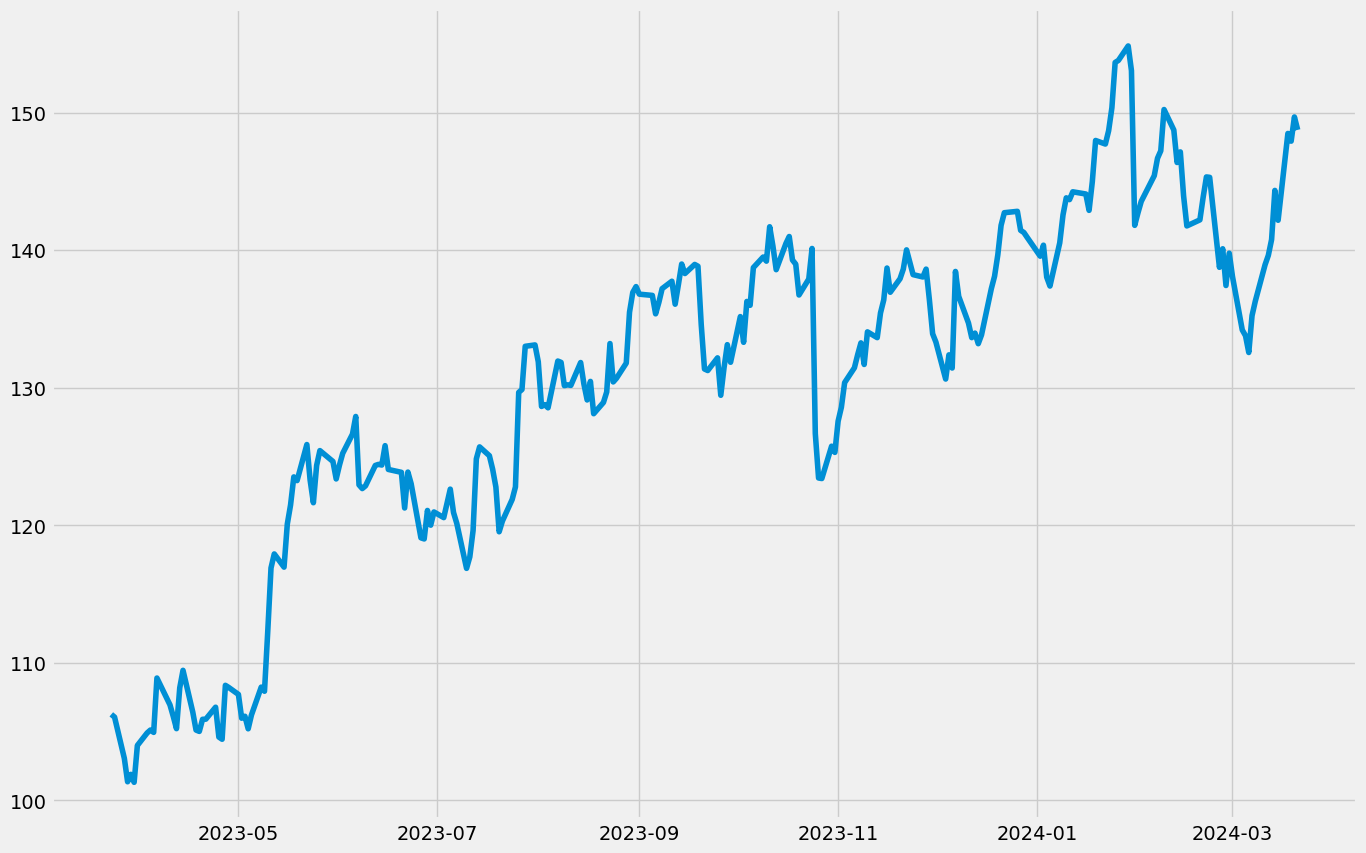

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

### Using ARIMA for Time Series Forecasting
Before applying the ARIMA model for Time Series Forecasting, it's essential to determine whether our dataset exhibits stationarity or seasonality. The visualization of the closing stock prices graph above indicates that our dataset lacks stationarity. To conduct a thorough assessment of stationarity and seasonality within our dataset, we can employ the seasonal decomposition method. This technique decomposes the time series data into distinct components, namely trend, seasonality, and residuals, providing valuable insights into the underlying patterns of the time series data.

- **Assessment of Data**: Before proceeding with modeling, it's crucial to evaluate the stationarity or seasonality of the dataset.
- **Utilizing Seasonal Decomposition**: The seasonal decomposition method is employed to dissect the time series data, revealing its inherent components: trend, seasonality, and residuals.
- **Insight Generation**: By decomposing the data, we gain a deeper understanding of its underlying patterns, enabling more informed modeling decisions for Time Series Forecasting.

<Figure size 640x480 with 0 Axes>

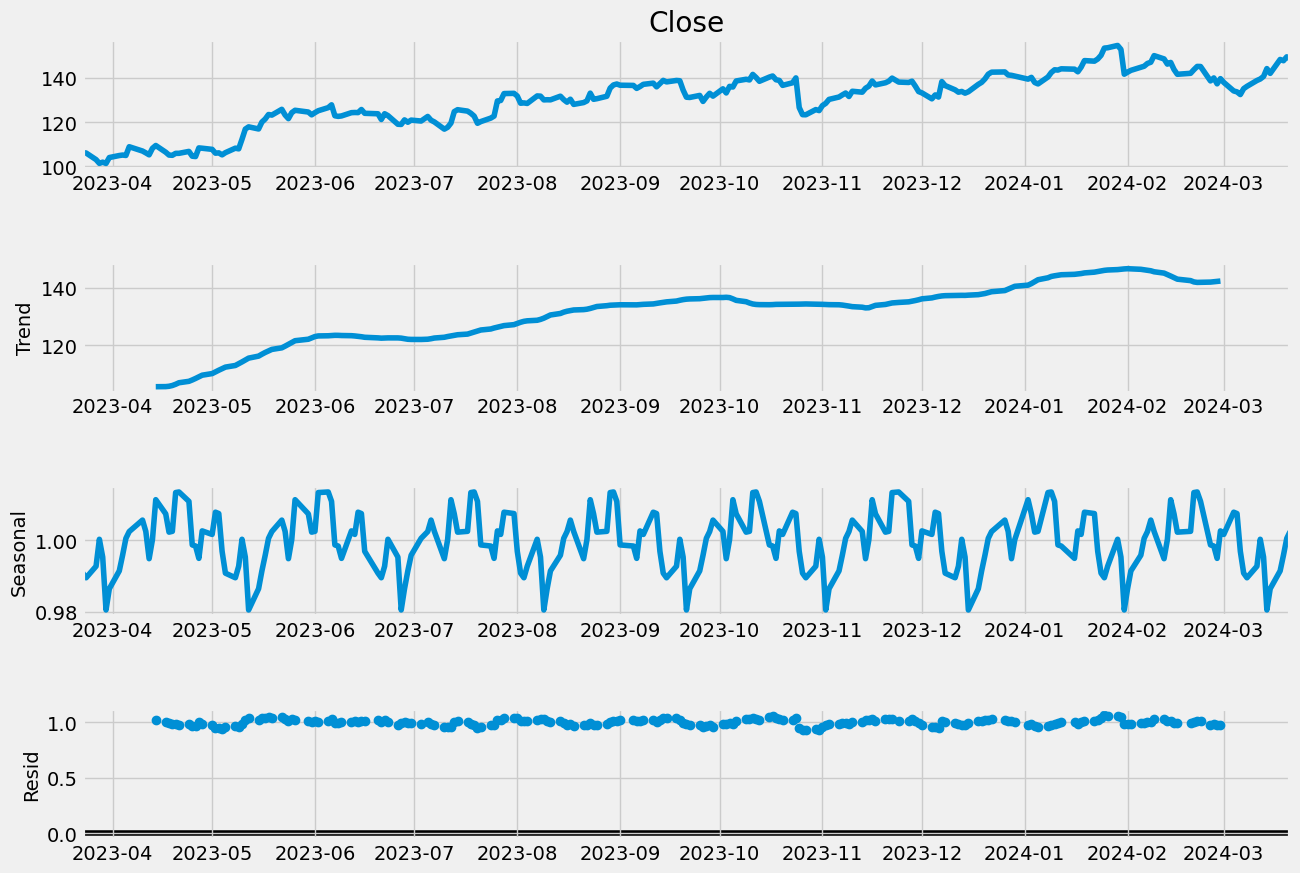

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Determine an appropriate period for seasonality based on the frequency of the data
# For daily data, we can try periods of 7 for weekly seasonality, or 30 for monthly seasonality
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)

# Plot the decomposed components
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)


Our dataset's seasonality prompts the use of the Seasonal ARIMA (SARIMA) model for Time Series Forecasting. However, we'll initially explore the ARIMA model to grasp both approaches comprehensively.

**Parameter Determination**:
- **p Determination**: We identify 'p' by examining the autocorrelation of the 'Close' column.
- **q Determination**: The value of 'q' is derived from the partial autocorrelation plot.
- **d Selection**: 'd' is set to 1 for seasonal data; 0 for stationary data.

This process ensures that we select suitable parameters for the ARIMA or SARIMA model, paving the way for effective Time Series Forecasting.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

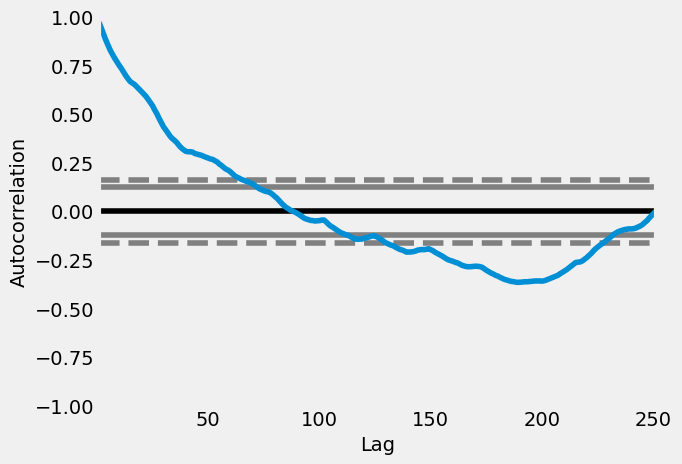

In [24]:
pd.plotting.autocorrelation_plot(data["Close"])

Based on the autocorrelation plot provided, we observe the curve descending after the 5th line of the first boundary. This delineates our choice for the p-value, which is determined as 5. Now, we proceed to ascertain the value of q (moving average):

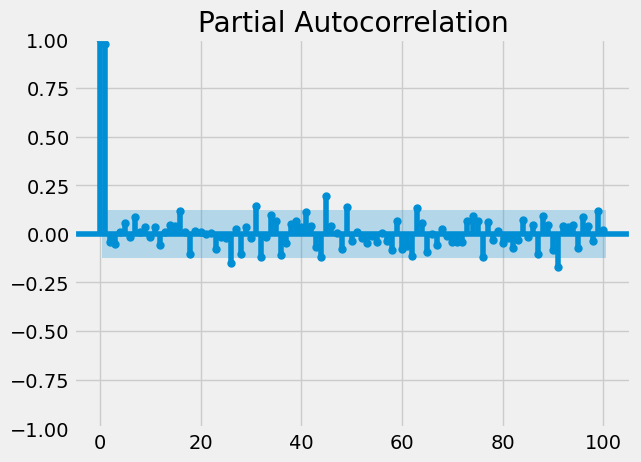

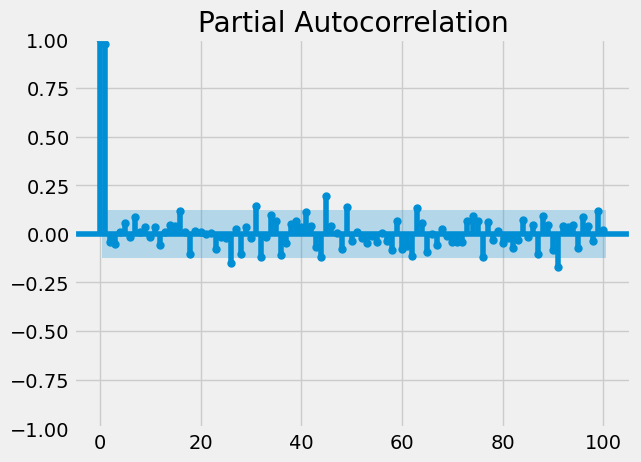

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

From the partial autocorrelation plot presented, we discern that only 1 point extend significantly beyond the others. This characteristic informs our determination of the q value, which we identify as 2. With both the p and q values established, let's proceed to construct an ARIMA model.

In [28]:
p, d, q = 5, 1, 2

# Import ARIMA from the new module
from statsmodels.tsa.arima.model import ARIMA

# Create ARIMA model
model = ARIMA(data["Close"], order=(p, d, q))  

# Fit the model
fitted = model.fit()

# Display model summary
print(fitted.summary())


C:\Users\anike\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -558.722
Date:                Sat, 23 Mar 2024   AIC                           1133.445
Time:                        00:03:37   BIC                           1161.617
Sample:                             0   HQIC                          1144.783
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8419      2.301      0.366      0.714      -3.667       5.351
ar.L2          0.0815      2.199      0.037      0.970      -4.228       4.391
ar.L3         -0.1009      0.103     -0.978      0.3

In [29]:
predictions = fitted.predict()
print(predictions)

Date
2023-03-23      0.000000
2023-03-24    106.260014
2023-03-27    106.055711
2023-03-28    102.992289
2023-03-29    101.261727
                 ...    
2024-03-15    144.503126
2024-03-18    142.118179
2024-03-19    148.229311
2024-03-20    148.121515
2024-03-21    148.954590
Name: predicted_mean, Length: 251, dtype: float64


Building an ARIMA model on seasonal time series data often yields inaccurate predictions due to its inability to effectively capture seasonal patterns. To address this limitation, we turn to the Seasonal ARIMA (SARIMA) model, specifically designed to handle such data.

Here's the approach to construct a SARIMA model:

In [30]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\anike\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\anaconda3\ana\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -542.806
Date:                            Sat, 23 Mar 2024   AIC                           1115.612
Time:                                    00:05:26   BIC                           1167.696
Sample:                                         0   HQIC                          1136.603
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2435      0.171      7.257      0.000       0.908       1.579
ar.L2         -0.7990      0.167   

Let's proceed to forecast future stock prices for the upcoming 10 days using the SARIMA model.

In [31]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    150.022384
252    150.082062
253    150.333823
254    150.478197
255    150.742990
256    149.670450
257    148.522208
258    147.722750
259    148.495554
260    148.748000
261    149.201828
Name: predicted_mean, dtype: float64


C:\Users\anike\anaconda3\ana\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

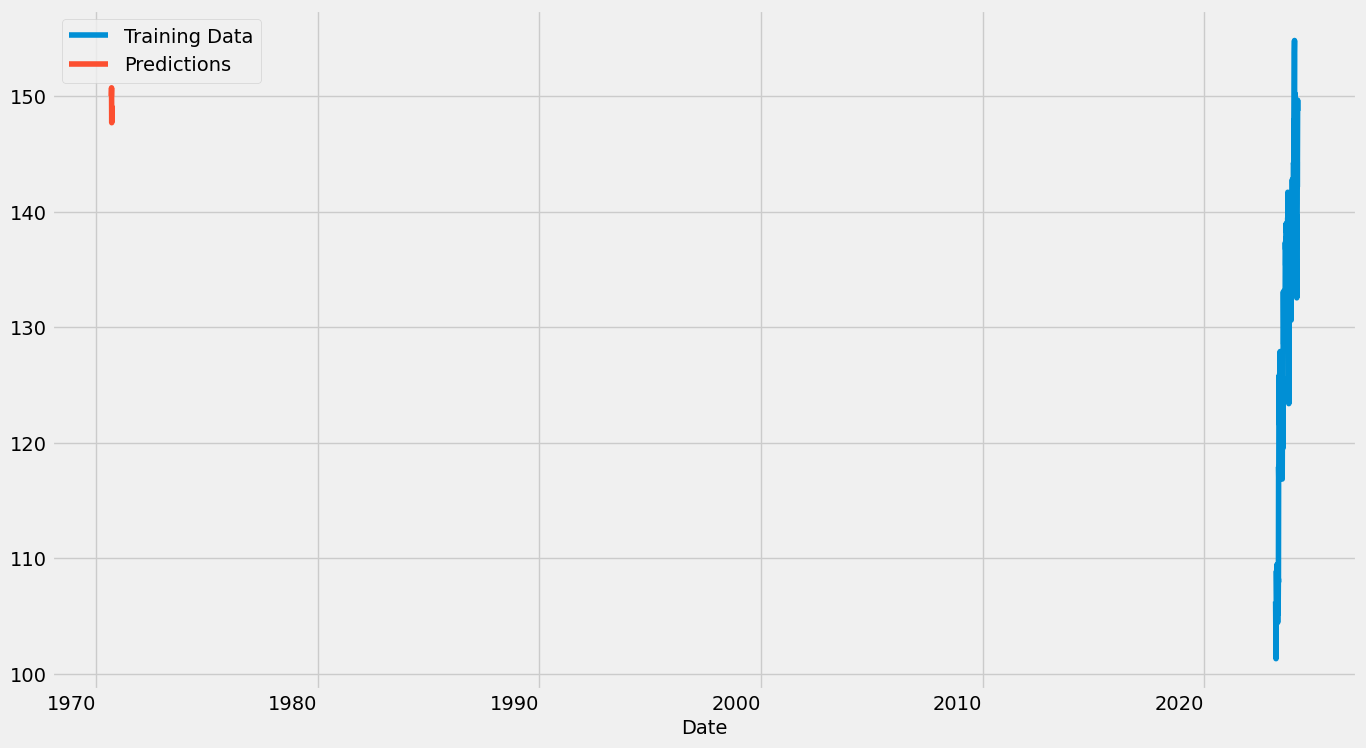

In [34]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

### Conclusion

ARIMA, or Autoregressive Integrated Moving Average, serves as a potent algorithm employed in forecasting Time Series Data. When confronted with stationary data, ARIMA proves instrumental, while Seasonal ARIMA (SARIMA) becomes indispensable for seasonal data patterns. We trust that you've found this article on Time Series Forecasting with ARIMA using Python insightful and informative. Don't hesitate to share any queries or insights in the comments section below.